<a href="https://colab.research.google.com/github/devbhojwani/devdatascience/blob/master/heart_disease_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

heart= pd.read_csv("heart.csv")

training= heart.iloc[0:415]

heart_training = training.drop(['row.names', 'famhist'], 1)

heart_training_x = heart_training.drop('chd', 1)
heart_training_y = heart_training['chd']

In [0]:
testing = heart.iloc[415:]

heart_testing = testing.drop(['row.names', 'famhist'], 1)

heart_testing_x = heart_testing.drop('chd', 1)
heart_testing_y = heart_testing['chd']


In [15]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz

clf = LogisticRegression(fit_intercept=False)
clf.fit(heart_training_x, heart_training_y)

heart_predicted = np.array(clf.predict(heart_testing_x))
heart_test_array = np.array(heart_testing_y)

print('Predictions:', heart_predicted)
print('Actual:     ', heart_test_array)

heart_matches = heart_predicted == heart_test_array

Predictions: [0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1]
Actual:      [1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 1 1 0 0 1 0 0 1]


In [16]:
features = heart_training_x.columns.values
list(zip(features, clf.coef_[0]))

[('sbp', -0.007487533292450007),
 ('tobacco', 0.08672513707975749),
 ('ldl', 0.19877654598145264),
 ('adiposity', 0.06063199786113005),
 ('typea', 0.01302474007789735),
 ('obesity', -0.17405407192438044),
 ('alcohol', 0.0010143742731325402),
 ('age', 0.03162153590139859)]

In [17]:
hits = heart_matches.sum()
total = len(heart_matches)
acc = hits/total*100.0
print("Accuracy: " + str(acc) + "%")

Accuracy: 74.46808510638297%


In [19]:
dtree = DecisionTreeClassifier()
dtree.fit(heart_training_x, heart_training_y)

heart_predicted = np.array(dtree.predict(heart_testing_x))
heart_test_array = np.array(heart_testing_y)

print('Predictions:', heart_predicted)
print('Actual:     ', heart_test_array)

heart_matches = heart_predicted == heart_test_array

Predictions: [0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 1 1 1 0]
Actual:      [1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 1 1 0 0 1 0 0 1]


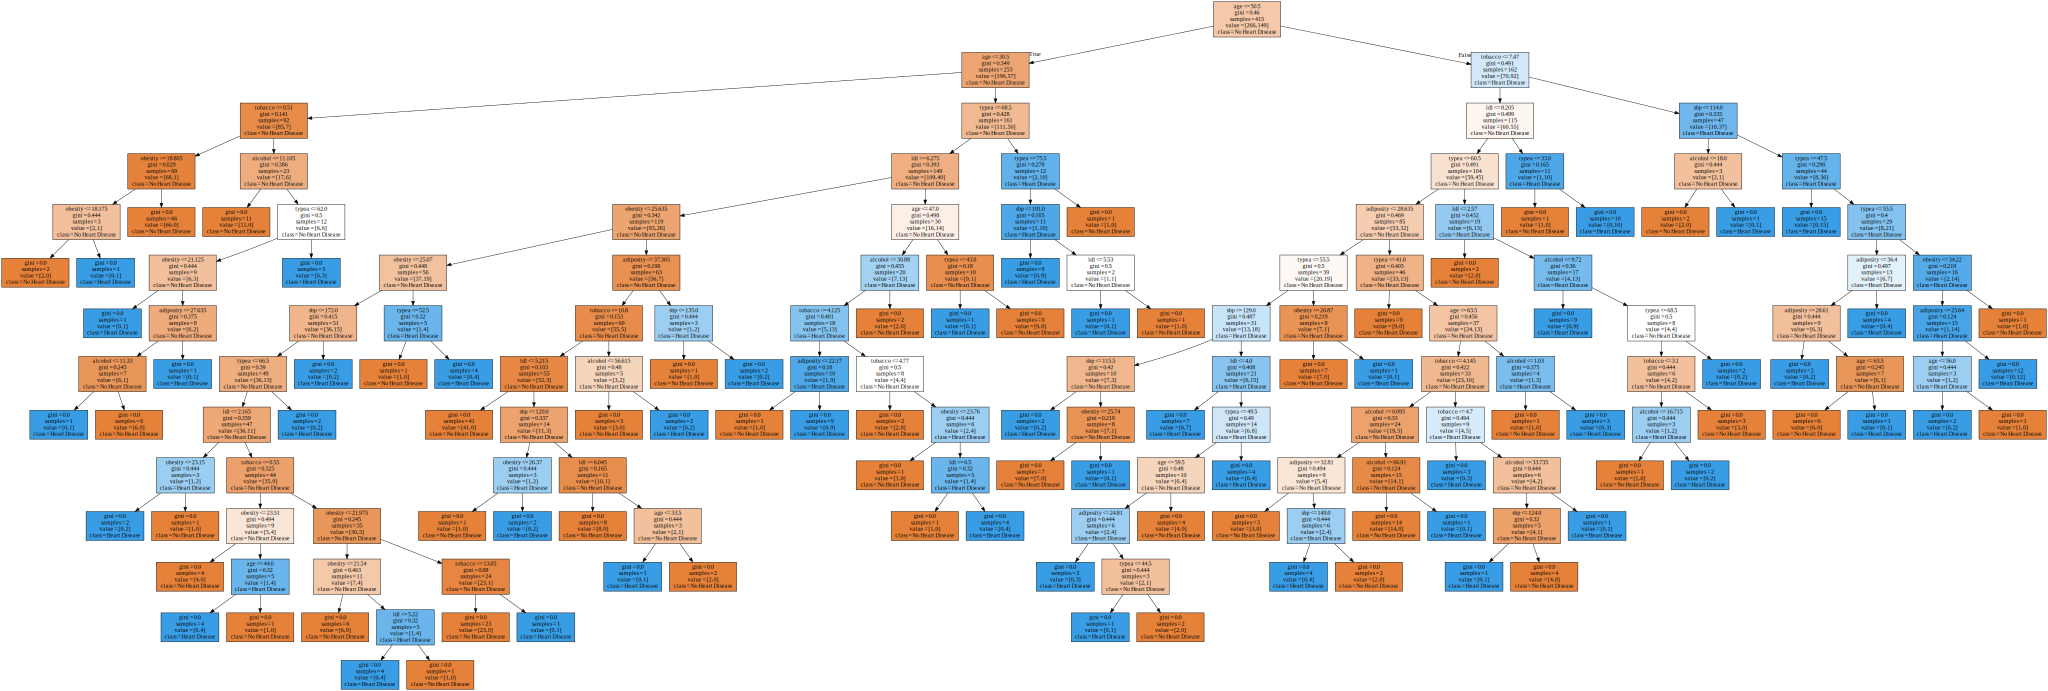

In [20]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
labels = heart_training_x.columns
graph = Source(export_graphviz(dtree, out_file=None
   , feature_names=labels, class_names=['No Heart Disease', 'Heart Disease']
   , filled = True))
display(SVG(graph.pipe(format='svg')))